In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from math import sqrt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,17.0,2016-03-28 19:55:43.000,24,Marquell,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,21.0,2015-02-11 15:09:26.000,55,Theodore,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,36.0,2015-11-19 17:29:21.000,358,Galen,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,27.0,2015-12-08 04:19:33.000,452,Posey,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [6]:
columns_remove = ['Product_id','instock_date','Customer_name','Product_Category']

for col in columns_remove:
    
    df_train.drop(col,axis = 1,inplace=True)
    df_test.drop(col,axis = 1,inplace=True)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3429 non-null   float64
 1   Market_Category   3430 non-null   int64  
 2   Loyalty_customer  3430 non-null   object 
 3   Grade             3430 non-null   int64  
 4   Demand            3430 non-null   int64  
 5   Discount_avail    3430 non-null   int64  
 6   charges_1         3394 non-null   float64
 7   charges_2 (%)     3425 non-null   float64
 8   Minimum_price     3416 non-null   float64
 9   Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 268.1+ KB


In [8]:
#
columns_to_fill = ['Stall_no','charges_1','charges_2 (%)','Minimum_price','Discount_avail','Maximum_price']

for cols in columns_to_fill :
    
    df_train[cols].fillna(df_train[cols].median(),inplace=True)
    
df_train['Selling_Price'].fillna(df_train['Selling_Price'].mean(),inplace=True)

In [9]:
df_train.isna().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [10]:
test_columns_to_fill = ['Stall_no','charges_1','charges_2 (%)','Minimum_price']


for cols in test_columns_to_fill :
    
    df_test[cols].fillna(df_test[cols].median(),inplace=True)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   float64
 1   Market_Category   3430 non-null   int64  
 2   Loyalty_customer  3430 non-null   object 
 3   Grade             3430 non-null   int64  
 4   Demand            3430 non-null   int64  
 5   Discount_avail    3430 non-null   int64  
 6   charges_1         3430 non-null   float64
 7   charges_2 (%)     3430 non-null   float64
 8   Minimum_price     3430 non-null   float64
 9   Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 268.1+ KB


In [12]:
label_Encoder = preprocessing.LabelEncoder()

In [13]:
df_train['Loyalty_customer'] = label_Encoder.fit_transform(df_train['Loyalty_customer'])
df_test['Loyalty_customer'] = label_Encoder.transform(df_test['Loyalty_customer'])

#  Features Selection

In [14]:
df_train.var()

Stall_no            2.051585e+02
Market_Category     2.899377e+04
Loyalty_customer    2.378501e-01
Grade               1.050813e+00
Demand              8.463399e+02
Discount_avail      1.201338e-01
charges_1           1.501886e+04
charges_2 (%)       1.804830e+01
Minimum_price       4.788919e+06
Maximum_price       1.309851e+07
Selling_Price       8.817901e+06
dtype: float64

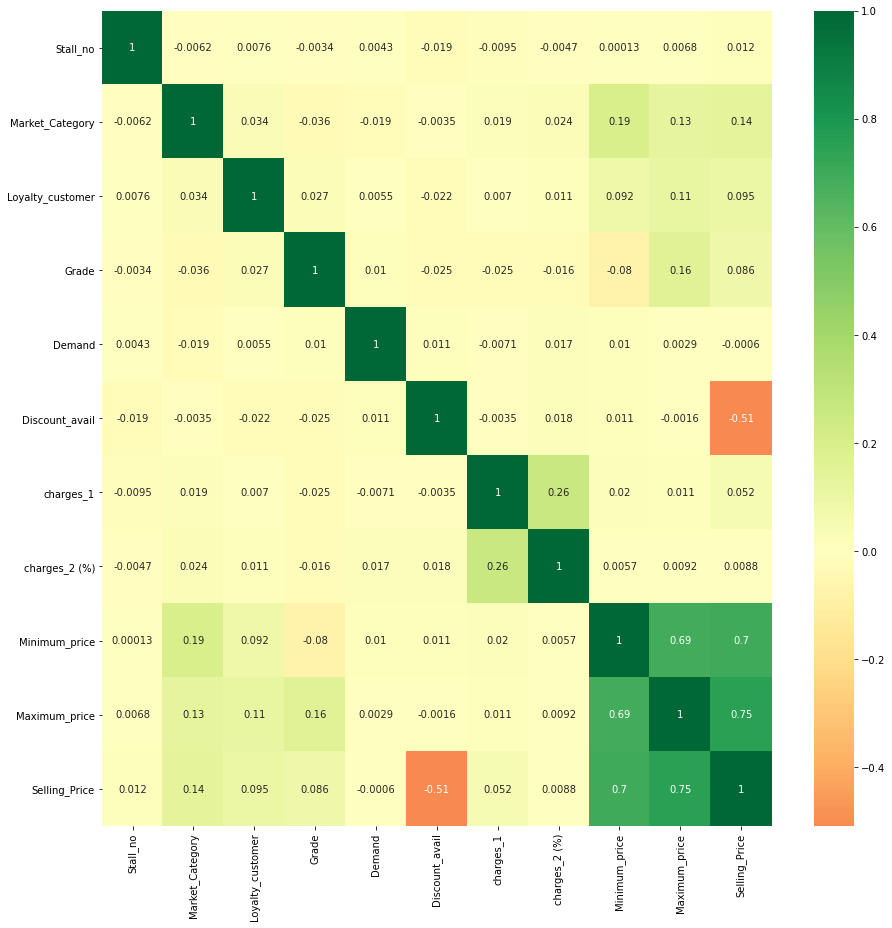

In [15]:
plt.figure(figsize=(15,15))
p = sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',center=0)

In [16]:
#ax = sns.pairplot(df_train)

In [17]:
abs(df_train.corr()['Selling_Price'])

Stall_no            0.011690
Market_Category     0.138289
Loyalty_customer    0.095352
Grade               0.086204
Demand              0.000599
Discount_avail      0.508438
charges_1           0.052109
charges_2 (%)       0.008839
Minimum_price       0.695802
Maximum_price       0.747196
Selling_Price       1.000000
Name: Selling_Price, dtype: float64

In [18]:
abs(df_train.corr()['Selling_Price'][abs(df_train.corr()['Selling_Price']) > 0.5].drop('Selling_Price')).index.tolist()

['Discount_avail', 'Minimum_price', 'Maximum_price']

In [19]:
y = df_train['Selling_Price']

In [20]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

for val in vals:
    
    features = abs(df_train.corr()['Selling_Price'][abs(df_train.corr()['Selling_Price']) > val].drop('Selling_Price')).index.tolist()
    
    X = df_train.drop(columns='Selling_Price')
    
   
    X = X[features]
    
    print(features)
    
    cv = KFold(n_splits=10,shuffle=False)
    classifier_pipeline = make_pipeline(StandardScaler(),KNeighborsRegressor())
    y_pred = cross_val_predict(classifier_pipeline,X,y,cv=cv)
    print('RMSE : ',str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print('R_squared : ',str(round(sqrt(r2_score(y,y_pred)),2)))
    
    

['Market_Category', 'Discount_avail', 'Minimum_price', 'Maximum_price']
RMSE :  634.6
R_squared :  0.98
['Discount_avail', 'Minimum_price', 'Maximum_price']
RMSE :  650.87
R_squared :  0.98
['Discount_avail', 'Minimum_price', 'Maximum_price']
RMSE :  650.87
R_squared :  0.98
['Discount_avail', 'Minimum_price', 'Maximum_price']
RMSE :  650.87
R_squared :  0.98
['Discount_avail', 'Minimum_price', 'Maximum_price']
RMSE :  650.87
R_squared :  0.98
['Minimum_price', 'Maximum_price']
RMSE :  1945.41
R_squared :  0.76
['Maximum_price']
RMSE :  2115.55
R_squared :  0.7


In [21]:
X = df_train.drop('Selling_Price',axis=1)
y = df_train['Selling_Price']

In [22]:
X.shape

(6368, 10)

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [24]:
sfsl = sfs(classifier_pipeline,k_features=10,forward=True,scoring='neg_mean_squared_error',cv=cv)

In [25]:
sfsl.fit(X,y)

sfsl.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([-4545972.43127276, -4522262.74781717, -4933125.97470116,
         -4570475.27838291, -4252285.24278792, -3956044.3160844 ,
         -4984957.99929503, -4522103.5565885 , -4882597.98235574,
         -3584816.79684153]),
  'avg_score': -4475464.2326127095,
  'feature_names': ('Maximum_price',)},
 2: {'feature_idx': (5, 9),
  'cv_scores': array([-1340822.06704722, -1411907.57477283, -1138224.70970772,
         -1399977.77620088,  -844953.45617006,  -947235.69023384,
         -1484943.52627276, -1008314.01412973, -1282975.2687011 ,
         -1096831.7930237 ]),
  'avg_score': -1195618.5876259839,
  'feature_names': ('Discount_avail', 'Maximum_price')},
 3: {'feature_idx': (5, 8, 9),
  'cv_scores': array([-378174.7538609 , -657076.99042786, -324688.44994129,
         -581225.58410066, -199868.42950113, -203090.68866485,
         -562436.2480893 , -365500.54866136, -584951.60110631,
         -370103.56021387]),
  'avg_score': -422711.6854567525

In [26]:
result = ['Loyalty_customer',
   'Grade',
   'Discount_avail',
   'charges_1',
   'Minimum_price',
   'Maximum_price']

In [27]:
X = df_train[result]

In [28]:
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.3,random_state=100)

In [29]:
y_validation.shape

(1911,)

In [30]:
cv = KFold(n_splits=10,shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(),KNeighborsRegressor())

In [31]:
classifier_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [32]:
y_hat = classifier_pipeline.predict(X_validation)

In [33]:
print('RMSE : ',str(round(sqrt(mean_squared_error(y_validation,y_hat)),2)))
print('R_squared : ',str(round(sqrt(r2_score(y_validation,y_hat)),2)))

RMSE :  639.33
R_squared :  0.98


In [34]:
X_test = df_test[result]

In [35]:
y_prediction = classifier_pipeline.predict(X_test)

In [36]:
y_prediction

array([ 3364.6451344 ,  2152.6629626 , 10707.5035602 , ...,
        5850.3050876 ,  3349.8958024 ,   973.66665657])

Text(0, 0.5, 'Predicted value')

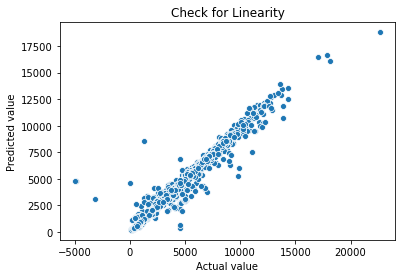

In [37]:
sns.scatterplot(y_validation,y_hat)
plt.title('Check for Linearity')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

Text(0.5, 0, 'Errors')

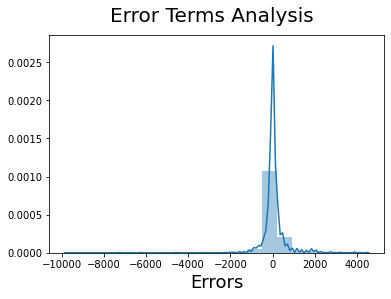

In [38]:
fig = plt.figure()
sns.distplot((y_validation- y_hat), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [39]:
test_data = pd.read_csv('test.csv')
submission_file = pd.DataFrame({'Product_id': test_data['Product_id'],'Selling_Price': y_prediction})
submission_file.to_csv('sample_submission.csv', index = False)
sub = pd.read_csv('sample_submission.csv')
sub

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3364.645134
1,ACCEGCATKHNRXUHW,2152.662963
2,NKCE6GJ5XVJDXNNZ,10707.503560
3,NKCEB8BK3ZXDHDHM,9000.947219
4,TOPEFDXSAHRNPF94,5461.604749
...,...,...
3425,BBAE9K7BXFUTDNBK,3927.889436
3426,RTRDYPA4PJHCJCGF,9161.141362
3427,TUNE8FWQBS7TVVT7,5850.305088
3428,NKCEGMUABCRGUZPE,3349.895802


In [40]:
df = pd.DataFrame()

In [41]:
df['actual'] = y_validation
df['predicted'] = y_hat

In [42]:
df

,actual,predicted
2513,769.231069,756.423971
4882,3286.871280,3045.548632
5100,3089.536800,3036.140216
2672,1669.060800,1589.677702
781,3246.061392,3193.835773
...,...,...
1974,2995.690500,2864.516255
5882,726.317156,715.674855
157,4504.779825,4646.077917
4989,347.354865,333.822677
